In [40]:
import numpy as np
######################################psmdopochl#################################################################33
sys = 'psmdopochl'

## HMM
# phase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/psmdopochl/train7-psmdopochl300k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# if 'HMM' in phase_file and (sum(phase[:,0] == 0) > sum(phase[:,0] == 1)):
#     phase = 1 - phase
# ## density
phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/19000-20000/psmdopochl-rawdata.xvg'
phase = np.loadtxt(phase_file)[:,1:]

print(phase.shape)
scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/psmdopochl_scd.xvg'
scd = np.loadtxt(scd_file)[:,1:]
print(scd.shape)
area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/psmdopochl_area.xvg'
area = np.loadtxt(area_file)[:,1:]
print(area.shape)
# 去掉chol
phase = np.hstack((phase[:, :324], phase[:, 476:]))
scd = np.hstack((scd[:, :324], scd[:, 476:]))
area = np.hstack((area[:, :324], area[:, 476:]))
print(area.shape)


######################################dpdochl#################################################################33
# sys = 'dpdochl280k'
## HMM
# phase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdochl280k/train1-dpdochl280k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# if 'HMM' in phase_file and (sum(phase[:,0] == 0) > sum(phase[:,0] == 1)):
#     phase = 1 - phase
# ## density
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/7000-8000/dpdochl280k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]

# sys = 'dpdochl290k'
# ## HMM
# phase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdochl290k/train1-dpdochl290k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# if 'HMM' in phase_file and (sum(phase[:,0] == 0) > sum(phase[:,0] == 1)):
#     phase = 1 - phase
# ## density
# # phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/8000-9000/dpdochl290k-rawdata.xvg'
# # phase = np.loadtxt(phase_file)[:,1:]

# scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_scd.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# print(scd.shape)
# area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_area.xvg'
# area = np.loadtxt(area_file)[:,1:]
# print(area.shape)

# # 去掉chol
# phase = np.hstack((phase[:, :404], phase[:, 576:980]))
# area = np.hstack((area[:, :404], area[:, 576:980]))
# print(phase.shape)
# print(scd.shape)
# print(area.shape)

######################################dpdo#################################################################33
# sys = 'dpdo280k'
# # ## HMM
# # phase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdo280k/train5-dpdo280k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# if 'HMM' in phase_file and (sum(phase[:,0] == 0) > sum(phase[:,0] == 1)):
#     phase = 1 - phase
# ## density
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/9000-10000/dpdo280k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]

# sys = 'dpdo290k'
# # ## HMM
# # phase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdo290k/train0-dpdo290k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# if 'HMM' in phase_file and (sum(phase[:,0] == 0) > sum(phase[:,0] == 1)):
#     phase = 1 - phase
# ## density
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/9000-10000/dpdo290k-rawdata.xvg'
# phase = np.loadtxt(phase_file)[:,1:]

# print(phase.shape)
# scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_scd.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# print(scd.shape)
# area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_area.xvg'
# area = np.loadtxt(area_file)[:,1:]
# print(area.shape)


(200, 512)
(200, 512)
(200, 512)
(200, 360)


In [41]:
import numpy as np
import pandas as pd
# 初始化空的 DataFrame
data_list = []
# 遍历每个时刻和每个脂质，逐一提取数据
for t in range(phase.shape[0]):          # 遍历每个时刻
    for l in range(phase.shape[1]):      # 遍历每个脂质
        data_list.append({
            "time": t,
            "lipid": l,
            "phase": phase[t, l],        # 相态标签
            "scd": scd[t, l],            # scd 值
            "area": area[t, l]           # area 值
        })
# 构建 DataFrame
df = pd.DataFrame(data_list)
# 根据相态标签筛选出 ld 和 lo 的数据（可选）
df_ld = df[df["phase"] == 0]  # ld 相态
df_lo = df[df["phase"] == 1]  # lo 相态
# 输出 DataFrame 的前几行
print("完整的 DataFrame:")
print(df.head())
print("\nld 相态的前几行:")
print(df_ld.head())
print("\nlo 相态的前几行:")
print(df_lo.head())

完整的 DataFrame:
   time  lipid  phase     scd   area
0     0      0    1.0  0.3767  43.72
1     0      1    1.0  0.3646  42.10
2     0      2    1.0  0.3977  49.22
3     0      3    1.0  0.3986  43.66
4     0      4    1.0  0.3566  55.18

ld 相态的前几行:
    time  lipid  phase     scd   area
5      0      5    0.0  0.3011  58.77
7      0      7    0.0  0.3505  49.00
10     0     10    0.0  0.3412  53.48
16     0     16    0.0  0.3085  53.10
17     0     17    0.0  0.3037  50.88

lo 相态的前几行:
   time  lipid  phase     scd   area
0     0      0    1.0  0.3767  43.72
1     0      1    1.0  0.3646  42.10
2     0      2    1.0  0.3977  49.22
3     0      3    1.0  0.3986  43.66
4     0      4    1.0  0.3566  55.18


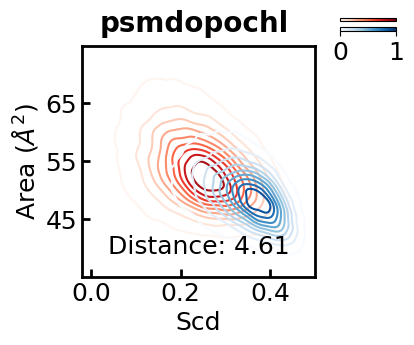

In [42]:
# 导入绘图的库
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.stats as stats
# 创建画布
fig = plt.figure(figsize=(3,3))
grid = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0) # 创建一个 4x4 的网格布局，并设置网格之间的水平 (hspace) 和垂直 (wspace) 间距为 0.5。这个网格布局将用于放置多个子图。
# 创建子图
ax_joint = plt.subplot(grid[0, 0]) # 创建子图，用于显示联合密度图。
# 计算df_ld和df_lo的密度估计
kde_ld = stats.gaussian_kde([df_ld['scd'], df_ld['area']])
kde_lo = stats.gaussian_kde([df_lo['scd'], df_lo['area']])
# 获取坐标网格用于计算密度（在x和y的范围内进行采样）
xgrid = np.linspace(df_ld['scd'].min(), df_ld['scd'].max(), 100)
ygrid = np.linspace(df_ld['area'].min(), df_ld['area'].max(), 100)
X, Y = np.meshgrid(xgrid, ygrid)
positions = np.vstack([X.ravel(), Y.ravel()])
# 计算每个数据集的密度值
density_ld = kde_ld(positions).reshape(X.shape)
density_lo = kde_lo(positions).reshape(X.shape)
# 计算密度的质心
centroid_ld = np.array([np.sum(X * density_ld) / np.sum(density_ld), np.sum(Y * density_ld) / np.sum(density_ld)])
centroid_lo = np.array([np.sum(X * density_lo) / np.sum(density_lo), np.sum(Y * density_lo) / np.sum(density_lo)])
# 计算两个质心之间的欧氏距离
distance = np.linalg.norm(centroid_ld - centroid_lo)

# 创建中间的联合密度图
sns_kde_ld = sns.kdeplot(data=df_ld, x="scd", y="area", cmap="Reds", fill=False, ax=ax_joint, alpha=1)
sns_kde_lo = sns.kdeplot(data=df_lo, x="scd", y="area", cmap="Blues", fill=False, ax=ax_joint, alpha=1)
# # 获取密度最高的点
# max_density_ld = np.unravel_index(np.argmax(sns_kde_ld.get_lines()[0].get_segments()[0]), x.shape)
# max_density_lo = np.unravel_index(np.argmax(sns_kde_lo.get_lines()[0].get_segments()[0]), x.shape)
# centroid_ld = np.array([x[max_density_ld], y[max_density_ld]])
# centroid_lo = np.array([x[max_density_lo], y[max_density_lo]])
# # 计算两个密度中心的欧氏距离
# distance = np.linalg.norm(centroid_ld - centroid_lo)
# 绘制连接两个密度中心的直线
# ax_joint.plot([centroid_ld[0], centroid_lo[0]], [centroid_ld[1], centroid_lo[1]], 'k--', lw=2)


# 设置坐标轴范围
# ax_joint.set_xlim(-0.1, 0.51)    # dpdo280k
# ax_joint.set_ylim(30, 85)
# ax_joint.set_xticks(np.arange(0, 0.5, 0.2))  
# ax_joint.set_yticks(np.arange(35, 85, 15))

ax_joint.set_xlim(-0.02, 0.5)  # dpdochl
ax_joint.set_ylim(35, 75)
ax_joint.set_xticks(np.arange(0.0, 0.5, 0.2)) 
ax_joint.set_yticks(np.arange(45, 75, 10))

# ax_joint.set_xlim(0.03, 0.5)    # psmdopochl
# ax_joint.set_ylim(37, 73)
# ax_joint.set_xticks(np.arange(0.0, 0.5, 0.2))
# ax_joint.set_yticks(np.arange(45, 70, 10))


# 在中间标记距离
ax_joint.text(sum(ax_joint.get_xlim()) / 2, ax_joint.get_ylim()[0]+(ax_joint.get_ylim()[1]-ax_joint.get_ylim()[0])/10, 
              f'Distance: {distance:.2f}', fontsize=18, color='black', ha='center')
# print(str((centroid_ld[0] + centroid_lo[0]) / 2), str((centroid_ld[1] + centroid_lo[1]) / 2))

# 设置 colorbar 的位置
axins1=inset_axes(ax_joint,width="60%",height="15%",
                  bbox_to_anchor=(0.98,1.1-0.05,0.4,0.1),bbox_transform=ax_joint.transAxes)
axins2=inset_axes(ax_joint,width="60%",height="15%",
                  bbox_to_anchor=(0.98,1.06-0.05,0.4,0.1),bbox_transform=ax_joint.transAxes)
# 创建 ScalarMappable 对象
norm1 = plt.Normalize(vmin=0, vmax=1)
sm1 = plt.cm.ScalarMappable(cmap="Reds", norm=norm1)
sm1.set_array([])
norm2 = plt.Normalize(vmin=0, vmax=1)
sm2 = plt.cm.ScalarMappable(cmap="Blues", norm=norm2)
sm2.set_array([])
# 添加 colorbar
cbar1=plt.colorbar(sm1,cax=axins1,orientation="horizontal")
cbar2=plt.colorbar(sm2,cax=axins2,orientation="horizontal")
# 隐藏 colorbar 的刻度和标签
cbar1.ax.tick_params(labelbottom=False, labeltop=False, bottom=False, top=False)
cbar2.ax.tick_params(labelsize=18)

# 设置刻度线
ax_joint.xaxis.set_ticks_position('bottom')
ax_joint.yaxis.set_ticks_position('left')
# ax_histx.xaxis.set_ticks_position('bottom')
# ax_histx.yaxis.set_ticks_position('left')
# ax_histy.xaxis.set_ticks_position('bottom')
# ax_histy.yaxis.set_ticks_position('left')
# 设置刻度线的粗细
ax_joint.tick_params(axis='both', which='major', width=2, size=6, labelsize=18, direction='in')
# 移除边际图上侧和右侧的坐标轴
# ax_joint.spines['top'].set_visible(False)
# ax_joint.spines['right'].set_visible(False)
# 设置坐标轴线的粗细
ax_joint.spines['top'].set_linewidth(2)
ax_joint.spines['bottom'].set_linewidth(2)
ax_joint.spines['left'].set_linewidth(2)
ax_joint.spines['right'].set_linewidth(2)
# 设置标签和图例
ax_joint.set_xlabel('Scd', fontsize=18)
ax_joint.set_ylabel('Area ($\AA^2$)', fontsize=18,)
# ax_histx.set_ylabel('Density', fontsize=18,)
# ax_histy.set_xlabel('Density', fontsize=18,)
# _=ax_histx.legend(["Ld", "Lo"], loc='upper right', frameon=False,bbox_to_anchor=(1.4,0.98), fontsize=12)
if( "HMM" in phase_file):
	plt.suptitle('HMM '+sys, fontsize=20, fontweight='bold', y=1)
	plt.savefig(
	'/data/gulab/yzdai/data4/phase_identification/plot/output/scd_area_joint_distri/HMM_'+sys+'-joint.png',        # 文件名
	dpi=350,             # 分辨率
	format='png',        # 文件格式
	bbox_inches='tight', # 自动调整边界框
	pad_inches=0.0,      # 边界填充
	# facecolor='white',   # 背景颜色
	# edgecolor='black',   # 边缘颜色
	transparent=True,   # 是否透明背景
	# metadata={'Author': 'Your Name'}  # 元数据
	)   
else:
	plt.suptitle(sys, fontsize=20, fontweight='bold', y=1)
	plt.savefig(
	'/data/gulab/yzdai/data4/phase_identification/plot/output/scd_area_joint_distri/'+sys+'-joint.png',        # 文件名
	dpi=350,             # 分辨率
	format='png',        # 文件格式
	bbox_inches='tight', # 自动调整边界框
	pad_inches=0.0,      # 边界填充
	# facecolor='white',   # 背景颜色
	# edgecolor='black',   # 边缘颜色
	transparent=True,   # 是否透明背景
	# metadata={'Author': 'Your Name'}  # 元数据
	)   


# distr

In [2]:
# sys = 'psmdopochl'
# sys = 'dpdochl280k'
# sys = 'dpdochl290k'
# sys = 'dpdo280k'
sys = 'dpdo290k'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if(sys == 'psmdopochl'):
    phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/19000-20000/psmdopochl-rawdata.xvg'
    HMMphase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/psmdopochl/train7-psmdopochl300k-rawdata.xvg'
    phase = np.loadtxt(phase_file)[:,1:]
    HMMphase = np.loadtxt(HMMphase_file)[:,1:]
    if (sum(HMMphase[:,0] == 0) > sum(HMMphase[:,0] == 1)):
        HMMphase = 1 - HMMphase
    print(phase.shape)
    scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/psmdopochl_scd.xvg'
    scd = np.loadtxt(scd_file)[:,1:]
    print(scd.shape)
    area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/psmdopochl_area.xvg'
    area = np.loadtxt(area_file)[:,1:]
    print(area.shape)
    # 去掉chol
    phase = np.hstack((phase[:, :324], phase[:, 476:]))
    HMMphase = np.hstack((HMMphase[:, :324], HMMphase[:, 476:]))
    scd = np.hstack((scd[:, :324], scd[:, 476:]))
    area = np.hstack((area[:, :324], area[:, 476:]))
    print(area.shape)

    scd_xlim = [0, 0.6]
    scd_ylim = [0, 8]
    scd_xticks = np.arange(0.2, 0.6 ,0.2)
    scd_yticks = np.arange(2, 8, 2)
    area_xlim = [37, 73]
    area_ylim = [0, 0.12]
    area_xticks = np.arange(45, 70 ,10)
    area_yticks = np.arange(0, 0.12, 0.04)
elif('dpdochl' in sys):
    if( sys == 'dpdochl290k'):
        phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/8000-9000/dpdochl290k-rawdata.xvg'
        HMMphase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdochl290k/train1-dpdochl290k-rawdata.xvg'
    elif( sys == 'dpdochl280k'):
        phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/7000-8000/dpdochl280k-rawdata.xvg'
        HMMphase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdochl280k/train1-dpdochl280k-rawdata.xvg'
    phase = np.loadtxt(phase_file)[:,1:]
    HMMphase = np.loadtxt(HMMphase_file)[:,1:]
    if (sum(HMMphase[:,0] == 0) > sum(HMMphase[:,0] == 1)):
        HMMphase = 1 - HMMphase
    print(phase.shape)
    scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_scd.xvg'
    scd = np.loadtxt(scd_file)[:,:]
    print(scd.shape)
    area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_area.xvg'
    area = np.loadtxt(area_file)[:,1:]
    print(area.shape)
    # 去掉chol
    phase = np.hstack((phase[:, :404], phase[:, 576:980]))
    HMMphase = np.hstack((HMMphase[:, :404], HMMphase[:, 576:980]))
    area = np.hstack((area[:, :404], area[:, 576:980]))
    print(phase.shape)
    print(scd.shape)
    print(area.shape)
    scd_xlim = [-0.02, 0.5]
    scd_ylim = [0, 8]
    scd_xticks = np.arange(0.0, 0.5, 0.2)
    scd_yticks = np.arange(2, 8, 2)
    area_xlim = [35, 75]
    area_ylim = [0, 0.12]
    area_xticks = np.arange(45, 75 ,10)
    area_yticks = np.arange(0, 0.12, 0.04)
elif('dpdo' in sys):
    if (sys == 'dpdo290k'):
        HMMphase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdo290k/train0-dpdo290k-rawdata.xvg'
        phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/9000-10000/dpdo290k-rawdata.xvg'
    elif(sys == 'dpdo280k'):
        HMMphase_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/HMM/dpdo280k/train5-dpdo280k-rawdata.xvg'
        phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/9000-10000/dpdo280k-rawdata.xvg'
    phase = np.loadtxt(phase_file)[:,1:]
    HMMphase = np.loadtxt(HMMphase_file)[:,1:]
    if (sum(HMMphase[:,0] == 0) > sum(HMMphase[:,0] == 1)):
        HMMphase = 1 - HMMphase
    print(phase.shape)
    scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_scd.xvg'
    scd = np.loadtxt(scd_file)[:,:]
    print(scd.shape)
    area_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/last1us_gap5_scd_area/'+sys+'_area.xvg'
    area = np.loadtxt(area_file)[:,1:]
    print(area.shape)
    scd_xlim = [-0.1, 0.51]
    scd_ylim = [0, 10]
    scd_xticks = np.arange(0.0, 0.5, 0.2)
    scd_yticks = np.arange(2, 10, 2)
    area_xlim = [30, 85]
    area_ylim = [0, 0.16]
    area_xticks = np.arange(35, 85, 15)
    area_yticks = np.arange(0, 0.16, 0.04)



(200, 1152)
(200, 1152)
(200, 1152)


In [3]:
# 初始化空的 DataFrame
data_list = []
HMMdata_list = []
# 遍历每个时刻和每个脂质，逐一提取数据
for t in range(phase.shape[0]):          # 遍历每个时刻
    for l in range(phase.shape[1]):      # 遍历每个脂质
        data_list.append({
            "time": t,
            "lipid": l,
            "phase": phase[t, l],        # 相态标签
            "scd": scd[t, l],            # scd 值
            "area": area[t, l]           # area 值
        })
        HMMdata_list.append({
            "time": t,
            "lipid": l,
            "phase": HMMphase[t, l],        # 相态标签
            "scd": scd[t, l],            # scd 值
            "area": area[t, l]           # area 值
        })
# 构建 DataFrame
df = pd.DataFrame(data_list)
HMMdf = pd.DataFrame(HMMdata_list)
# 根据相态标签筛选出 ld 和 lo 的数据（可选）
df_ld = df[df["phase"] == 0]  # ld 相态
df_lo = df[df["phase"] == 1]  # lo 相态
HMMdf_ld = HMMdf[HMMdf["phase"] == 0]  # ld 相态
HMMdf_lo = HMMdf[HMMdf["phase"] == 1]  # lo 相态

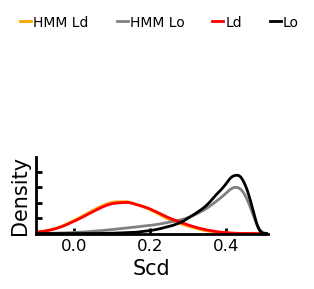

In [7]:
fig = plt.figure(figsize=(3, 1))
grid = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0) # 创建一个 4x4 的网格布局，并设置网格之间的水平 (hspace) 和垂直 (wspace) 间距为 0.5。这个网格布局将用于放置多个子图。
# 创建子图
ax = plt.subplot(grid[0, 0]) # 创建子图，用于显示联合密度图。
# 创建顶部直方图
sns.kdeplot(HMMdf_ld["scd"], ax=ax, color='orange', linewidth=2, label = 'HMM Ld', bw_adjust=1)
sns.kdeplot(HMMdf_lo["scd"], ax=ax, color='gray', linewidth=2, label = 'HMM Lo', bw_adjust=1)

sns.kdeplot(df_ld["scd"], ax=ax, color='red', linewidth=2, label = 'Ld', bw_adjust=1)
sns.kdeplot(df_lo["scd"], ax=ax, color='black', linewidth=2, label = 'Lo', bw_adjust=1)

ax = plt.gca()
ax.set_xlim(scd_xlim)
ax.set_ylim(scd_ylim)
ax.set_xticks(scd_xticks, fontsize= 15)
ax.set_yticks(scd_yticks, fontsize= 15) 

ax.tick_params(axis='both', which='major', width=2, size=4, direction = 'in', labelsize=12)
ax.tick_params(axis='y', which='major', width=2, size=4, direction = 'in', labelleft=False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(
    fontsize=10, 
    loc='upper left', 
    bbox_to_anchor=(-0.12,3),  # 控制图例在图形下方的位置
    ncol=4, 
    frameon=False,
    labelspacing=0.05,      # 控制图例项之间的垂直间距
    handlelength=0.8,      # 控制图例标记的长度
    handletextpad=0.15      # 控制图例标记和文字之间的水平间距
)
ax.set_xlabel('Scd', fontsize = 15)  # 去掉右侧直方图的 x 轴标签
ax.set_ylabel('Density', fontsize = 15)  # 去掉右侧直方图的 y 轴标签
plt.savefig(
'/data/gulab/yzdai/data4/phase_identification/plot/output/scd_area_joint_distri/'+sys+'-scd-legend.png',        # 文件名
dpi=350,             # 分辨率
format='png',        # 文件格式
bbox_inches='tight', # 自动调整边界框
pad_inches=0.0,      # 边界填充
# facecolor='white',   # 背景颜色
# edgecolor='black',   # 边缘颜色
transparent=True,   # 是否透明背景
# metadata={'Author': 'Your Name'}  # 元数据
) 

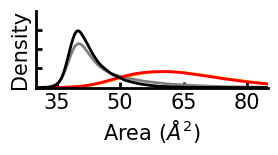

In [62]:
fig = plt.figure(figsize=(3, 1))
grid = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0) # 创建一个 4x4 的网格布局，并设置网格之间的水平 (hspace) 和垂直 (wspace) 间距为 0.5。这个网格布局将用于放置多个子图。
# 创建子图
ax = plt.subplot(grid[0, 0]) # 创建子图，用于显示联合密度图。
# 创建顶部直方图
sns.kdeplot(HMMdf_ld["area"], ax=ax, color='orange', linewidth=2, label = 'HMM Ld')
sns.kdeplot(HMMdf_lo["area"], ax=ax, color='gray', linewidth=2, label = 'HMM Lo')

sns.kdeplot(df_ld["area"], ax=ax, color='red', linewidth=2, label = 'Ld')
sns.kdeplot(df_lo["area"], ax=ax, color='black', linewidth=2, label = 'Lo')

ax = plt.gca()
ax.set_xlim(area_xlim)
ax.set_ylim(area_ylim)
ax.set_xticks(area_xticks)
ax.set_yticks(area_yticks) 
ax.tick_params(axis='both', which='major', width=2, size=4, direction = 'in', labelsize=15)
ax.tick_params(axis='y', which='major', width=2, size=4, direction = 'in', labelleft=False)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.legend(loc=0, frameon=False, fontsize = 8)
ax.set_xlabel('Area ($\AA^2$)', fontsize = 15)  # 去掉右侧直方图的 x 轴标签
ax.set_ylabel('Density', fontsize = 15)  # 去掉右侧直方图的 y 轴标签
plt.savefig(
'/data/gulab/yzdai/data4/phase_identification/plot/output/scd_area_joint_distri/'+sys+'-area.png',        # 文件名
dpi=350,             # 分辨率
format='png',        # 文件格式
bbox_inches='tight', # 自动调整边界框
pad_inches=0.0,      # 边界填充
# facecolor='white',   # 背景颜色
# edgecolor='black',   # 边缘颜色
transparent=True,   # 是否透明背景
# metadata={'Author': 'Your Name'}  # 元数据
) 